In [5]:
import pandas as pd
from utils import load_series_dfs

In [4]:
df = pd.read_excel('../data/gas_price.xlsx')

df.head()

,Datum,CEGHIX,TRP NCG
0,2015-01-01 06:00:00,23.61,21.5
1,2015-01-01 07:00:00,23.61,21.5
2,2015-01-01 08:00:00,23.61,21.5
3,2015-01-01 09:00:00,23.61,21.5
4,2015-01-01 10:00:00,23.61,21.5


In [31]:
series_dfs = load_series_dfs(data_dir=r"C:\Users\johan\Documents\FH_Master\data", filename="energy_with_weather.pkl")
series_dfs['FL_00024702.PLAN.MengeHH']

,consumption,hour,weekday,month,is_weekend,w_tl,w_rf,w_ff,w_ffx,w_cglo,w_so_h,w_rr,w_rrm,w_tb10,w_tb20
von | von,,,,,,,,,,,,,,,
2014-01-01 06:00:00,1.472,6,2,1,0,2.1,88.0,1.0,3.0,0.0,0.0,0.0,0.0,3.3,3.3
2014-01-01 07:00:00,1.517,7,2,1,0,2.1,88.0,1.0,3.0,0.0,0.0,0.0,0.0,3.3,3.3
2014-01-01 08:00:00,1.472,8,2,1,0,2.2,87.0,1.1,3.1,13.0,0.0,0.0,0.0,3.3,3.3
2014-01-01 09:00:00,1.517,9,2,1,0,2.2,84.0,1.4,4.0,63.0,0.0,0.0,0.0,3.3,3.3
2014-01-01 10:00:00,1.495,10,2,1,0,2.7,79.0,1.2,3.7,144.0,0.3,0.0,0.0,3.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,32.223,19,0,12,0,3.9,95.0,0.6,3.2,0.0,0.0,0.0,0.0,4.0,3.3
2018-12-31 20:00:00,29.348,20,0,12,0,3.9,96.0,0.3,3.4,0.0,0.0,0.0,0.0,4.0,3.3
2018-12-31 21:00:00,24.727,21,0,12,0,3.9,96.0,0.5,2.6,0.0,0.0,0.0,2.0,4.0,3.3


In [8]:
start, end = series_dfs['FL_00024702.PLAN.MengeHH'].index.min(), series_dfs['FL_00024702.PLAN.MengeHH'].index.max()
start, end

(Timestamp('2014-01-01 06:00:00'), Timestamp('2018-12-31 23:00:00'))

In [9]:
# 1. Datumsspalte in datetime konvertieren
df['Datum'] = pd.to_datetime(df['Datum'])

# 2. Datumsspalte als Index setzen
df = df.set_index('Datum')

# 3. (Optional) Index sortieren, falls er nicht bereits chronologisch ist
df = df.sort_index()

# 4. Kontrolle
df.head()

,CEGHIX,TRP NCG
Datum,,
2015-01-01 06:00:00,23.61,21.5
2015-01-01 07:00:00,23.61,21.5
2015-01-01 08:00:00,23.61,21.5
2015-01-01 09:00:00,23.61,21.5
2015-01-01 10:00:00,23.61,21.5


In [11]:
df = df.loc['2015-01-01 06:00:00':'2018-12-31 23:00:00']

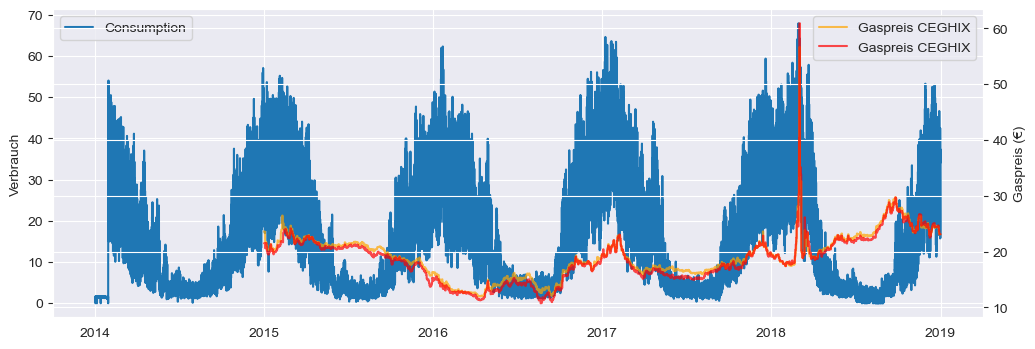

In [26]:
import matplotlib.pyplot as plt

# Verbrauch und Gaspreis im gleichen Plot
fig, ax1 = plt.subplots(figsize=(12,4))
ax1.plot(series_dfs['FL_00024702.PLAN.MengeHH']['consumption'], label='Consumption')
ax2 = ax1.twinx()
ax2.plot(df['CEGHIX'], color='orange', alpha=0.7, label='Gaspreis CEGHIX')
ax2.plot(df['TRP NCG'], color='red', alpha=0.7, label='Gaspreis CEGHIX')
ax1.set_ylabel('Verbrauch')
ax2.set_ylabel('Gaspreis (€)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

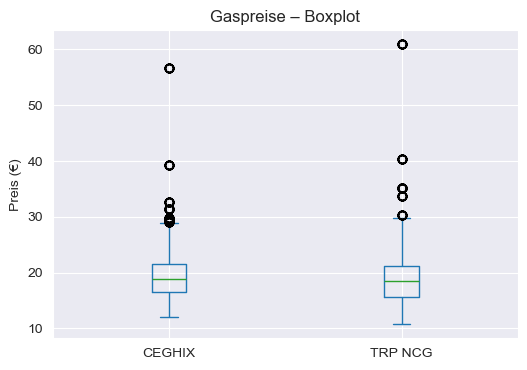

In [21]:

fig, ax = plt.subplots(figsize=(6, 4))
# Beide Serien auf einmal boxplotten
df[['CEGHIX', 'TRP NCG']].plot.box(ax=ax)
ax.set_title('Gaspreise – Boxplot')
ax.set_ylabel('Preis (€)')
plt.show()

In [29]:
start, end = df.index.min(), df.index.max()
df.columns = ['CEGH_WAP', 'THE_WAP']
start, end, df.head()

(Timestamp('2015-01-01 06:00:00'),
 Timestamp('2018-12-31 23:00:00'),
                      CEGH_WAP  THE_WAP
 Datum                                 
 2015-01-01 06:00:00     23.61     21.5
 2015-01-01 07:00:00     23.61     21.5
 2015-01-01 08:00:00     23.61     21.5
 2015-01-01 09:00:00     23.61     21.5
 2015-01-01 10:00:00     23.61     21.5)

In [32]:
for key, df_cons in series_dfs.items():
    # Verbrauchsdaten auf Gaspreis-Zeitraum begrenzen
    df_trim = df_cons.loc[start:end]
    # Gaspreise als neue Features hinzufügen (inner join auf Index)
    df_combined = df_trim.join(df[['CEGH_WAP', 'THE_WAP']], how='inner')
    # ggf. zurückspeichern
    series_dfs[key] = df_combined

# Kontrolle für einen Key
print(series_dfs['FL_00024702.PLAN.MengeHH'].head())
print(series_dfs['FL_00024702.PLAN.MengeHH'].index.min(),
      series_dfs['FL_00024702.PLAN.MengeHH'].index.max())
print(series_dfs['FL_00024702.PLAN.MengeHH'][['CEGH_WAP', 'THE_WAP']].isna().sum())

                     consumption  hour  weekday  month  is_weekend  w_tl  \
von  | von                                                                 
2015-01-01 06:00:00       48.447     6        3      1           0  -0.2   
2015-01-01 07:00:00       45.788     7        3      1           0   0.0   
2015-01-01 08:00:00       43.109     8        3      1           0   0.3   
2015-01-01 09:00:00       41.749     9        3      1           0   0.8   
2015-01-01 10:00:00       39.900    10        3      1           0   1.1   

                     w_rf  w_ff  w_ffx  w_cglo  w_so_h  w_rr  w_rrm  w_tb10  \
von  | von                                                                    
2015-01-01 06:00:00  92.0   0.2    2.1     0.0     0.0   0.0    5.0     2.8   
2015-01-01 07:00:00  94.0   0.2    1.5     0.0     0.0   0.0    0.0     2.8   
2015-01-01 08:00:00  93.0   0.6    4.0     8.0     0.0   0.0    5.0     2.9   
2015-01-01 09:00:00  90.0   0.4    3.0    53.0     0.0   0.0    0.0     

In [33]:
summary = []
for key, df in series_dfs.items():
    total = df.size
    nan   = df.isna().sum().sum()
    summary.append({
        'series_key': key,
        'nan_count': nan,
        'total_cells': total,
        'percent_nan': nan/total
    })

summary_df = pd.DataFrame(summary)

# 1) Kurz anschauen
print(summary_df)

# 2) Nur jene Serien mit NaNs filtern
print(summary_df[summary_df['nan_count']>0])

# 3) In Datei schreiben, wenn du willst
summary_df.to_csv('nan_overview.csv', index=False)

                    series_key  nan_count  total_cells  percent_nan
0     FL_00024702.PLAN.MengeHH          0       598026          0.0
1     FL_00024730.PLAN.MengeHH          0       598026          0.0
2     FL_00352243.PLAN.MengeHH          0       598026          0.0
3     FL_00352244.PLAN.MengeGA          0       598026          0.0
4     FL_00352244.PLAN.MengeKW          0       598026          0.0
5     FL_00024360.PLAN.MengeGA          0       598026          0.0
6     FL_00352254.PLAN.MengeGA          0       598026          0.0
7     FL_00025248.PLAN.MengeGA          0       598026          0.0
8   FL_00024360.PLAN.MengeHH.2          0       598026          0.0
9     FL_00024731.PLAN.MengeHH          0       598026          0.0
10    FL_00024735.PLAN.MengeHH          0       598026          0.0
11    FL_00024667.PLAN.MengeHH          0       598026          0.0
12    FL_00352218.PLAN.MengeHH          0       598026          0.0
13    FL_00025240.PLAN.MengeHH          0       

In [34]:
pd.to_pickle(series_dfs, "../data/final_learning_dfs.pkl")